In [1]:
import numpy as np
import scipy
from scipy.misc import imread
import maxflow

In [36]:
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
import sys, os
sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *

In [48]:
scoremap = load_hdf('/home/yuncong/csd395/CSHL_scoremaps_lossless_svm_Sat16ClassFinetuned_v3/MD603/0141/MD603_0141_roi1_denseScoreMapLossless_Pn.hdf')

In [49]:
scoremap.shape

(7393, 15457)

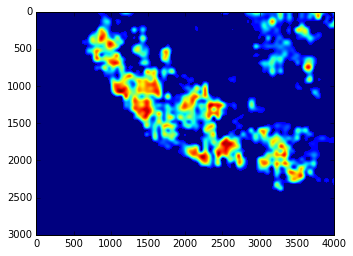

In [64]:
img = scoremap[3000:6000, 3000:7000]
plt.imshow(img);

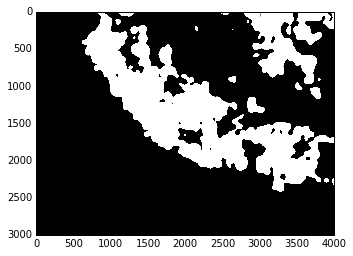

In [66]:
# Create the graph.
g = maxflow.Graph[int]()
# Add the nodes. nodeids has the identifiers of the nodes in the grid.
nodeids = g.add_grid_nodes(img.shape)
# Add non-terminal edges with the same capacity.

g.add_grid_edges(nodeids, .5)
# Add the terminal edges. The image pixels are the capacities
# of the edges from the source node. The inverted image pixels
# are the capacities of the edges to the sink node.
g.add_grid_tedges(nodeids, img, 1.-img)

# Find the maximum flow.
g.maxflow()
# Get the segments of the nodes in the grid.
sgm = g.get_grid_segments(nodeids)

# The labels should be 1 where sgm is False and 0 otherwise.
img2 = np.int_(np.logical_not(sgm))
# Show the result.

plt.imshow(img2, cmap=plt.cm.gray)
plt.show()